###Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

###Load Data

In [ ]:
df=pd.read_csv('WA_Fn-UseC_-IT-Help-Desk.csv')

###Data Profiling

In [ ]:
df.head()

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
0,1,1929,1 - Junior,50,Systems,Issue,2 - Normal,0 - Unassigned,3,1 - Unsatisfied
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied
2,3,925,2 - Regular,15,Access/Login,Request,2 - Normal,0 - Unassigned,0,0 - Unknown
3,4,413,4 - Management,22,Systems,Request,2 - Normal,0 - Unassigned,20,0 - Unknown
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied


###Transform Data

In [ ]:
def clean_satisfaction(value):
    if value == '0 - Unknown':
        return '0 - Neutral'
    return value
df['Satisfaction'] = df['Satisfaction'].apply(clean_satisfaction)

In [ ]:
def clean_satisfaction_column(df):
    mapping = {
    '1 - Unsatisfied': '1 - Unsatisfied',
    '0 - Neutral': '2 - Neutral',
    '2 - Satisfied': '3 - Satisfied',
    '3 - Highly satisfied': '4 - Highly satisfied'
    }
    df['Satisfaction'] = df['Satisfaction'].replace(mapping)
    return df
df = clean_satisfaction_column(df)

In [ ]:
df['Satisfaction'].unique()

array(['1 - Unsatisfied', '2 - Neutral', '4 - Highly satisfied',
       '3 - Satisfied'], dtype=object)

###Basic Information about Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ticket              100000 non-null  int64 
 1   requestor           100000 non-null  int64 
 2   RequestorSeniority  100000 non-null  object
 3   ITOwner             100000 non-null  int64 
 4   FiledAgainst        100000 non-null  object
 5   TicketType          100000 non-null  object
 6   Severity            100000 non-null  object
 7   Priority            100000 non-null  object
 8   daysOpen            100000 non-null  int64 
 9   Satisfaction        100000 non-null  object
dtypes: int64(4), object(6)
memory usage: 7.6+ MB


###Descriptive Statitic

In [ ]:
df.describe()

,ticket,requestor,ITOwner,daysOpen
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,999.030670,25.461000,6.842830
std,28867.657797,577.507916,14.447961,7.377876
min,1.000000,1.000000,1.000000,0.000000
25%,25000.750000,499.000000,13.000000,1.000000
50%,50000.500000,999.000000,26.000000,5.000000
75%,75000.250000,1499.000000,38.000000,10.000000
max,100000.000000,2000.000000,50.000000,54.000000


In [ ]:
df.sample(10)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
83135,83136,1864,2 - Regular,38,Software,Issue,2 - Normal,0 - Unassigned,10,2 - Neutral
51525,51526,872,3 - Senior,40,Systems,Request,2 - Normal,2 - Medium,8,3 - Satisfied
67400,67401,592,3 - Senior,46,Access/Login,Issue,2 - Normal,3 - High,1,2 - Neutral
41805,41806,434,3 - Senior,24,Systems,Request,2 - Normal,3 - High,7,4 - Highly satisfied
13111,13112,1131,4 - Management,42,Access/Login,Request,2 - Normal,3 - High,0,2 - Neutral
78599,78600,842,2 - Regular,27,Software,Request,2 - Normal,0 - Unassigned,3,4 - Highly satisfied
5525,5526,1184,1 - Junior,27,Systems,Request,2 - Normal,0 - Unassigned,6,3 - Satisfied
78745,78746,692,2 - Regular,6,Systems,Issue,2 - Normal,3 - High,11,3 - Satisfied
55013,55014,512,1 - Junior,31,Hardware,Request,2 - Normal,2 - Medium,11,2 - Neutral
50644,50645,948,1 - Junior,9,Access/Login,Request,2 - Normal,1 - Low,1,3 - Satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ticket              100000 non-null  int64 
 1   requestor           100000 non-null  int64 
 2   RequestorSeniority  100000 non-null  object
 3   ITOwner             100000 non-null  int64 
 4   FiledAgainst        100000 non-null  object
 5   TicketType          100000 non-null  object
 6   Severity            100000 non-null  object
 7   Priority            100000 non-null  object
 8   daysOpen            100000 non-null  int64 
 9   Satisfaction        100000 non-null  object
dtypes: int64(4), object(6)
memory usage: 7.6+ MB


###Create Numeric Column

In [ ]:
def extract_numeric_columns(df, columns):
    for col in columns:
        new_col_name = f"{col}_num"
        df[new_col_name] = df[col].str.extract(r'^(\d+)').astype(int)
    return df

columns_to_convert = ['Satisfaction', 'Priority', 'Severity', 'RequestorSeniority']
df = extract_numeric_columns(df, columns_to_convert)


In [ ]:
df.head(5)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num
0,1,1929,1 - Junior,50,Systems,Issue,2 - Normal,0 - Unassigned,3,1 - Unsatisfied,1,0,2,1
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied,1,1,1,2
2,3,925,2 - Regular,15,Access/Login,Request,2 - Normal,0 - Unassigned,0,2 - Neutral,2,0,2,2
3,4,413,4 - Management,22,Systems,Request,2 - Normal,0 - Unassigned,20,2 - Neutral,2,0,2,4
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied,1,1,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ticket                  100000 non-null  int64 
 1   requestor               100000 non-null  int64 
 2   RequestorSeniority      100000 non-null  object
 3   ITOwner                 100000 non-null  int64 
 4   FiledAgainst            100000 non-null  object
 5   TicketType              100000 non-null  object
 6   Severity                100000 non-null  object
 7   Priority                100000 non-null  object
 8   daysOpen                100000 non-null  int64 
 9   Satisfaction            100000 non-null  object
 10  Satisfaction_num        100000 non-null  int64 
 11  Priority_num            100000 non-null  int64 
 12  Severity_num            100000 non-null  int64 
 13  RequestorSeniority_num  100000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 

In [ ]:
df.describe()

,ticket,requestor,ITOwner,daysOpen,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,999.030670,25.461000,6.842830,2.566040,1.591270,2.047830,2.384730
std,28867.657797,577.507916,14.447961,7.377876,1.117762,1.254666,0.377497,1.017174
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,499.000000,13.000000,1.000000,2.000000,0.000000,2.000000,2.000000
50%,50000.500000,999.000000,26.000000,5.000000,2.000000,2.000000,2.000000,2.000000
75%,75000.250000,1499.000000,38.000000,10.000000,4.000000,3.000000,2.000000,3.000000
max,100000.000000,2000.000000,50.000000,54.000000,4.000000,3.000000,4.000000,4.000000


##Data Cleaning

In [ ]:
# Delete rows have Priority is '0 - Unassigned'
df_cleaned = df[df['Priority'] != '0 - Unassigned']
print(df_cleaned)

       ticket  requestor RequestorSeniority  ITOwner  FiledAgainst TicketType  \
1           2       1587        2 - Regular       15      Software    Request   
4           5        318         1 - Junior       22  Access/Login    Request   
5           6        858     4 - Management       38  Access/Login    Request   
6           7       1978         3 - Senior       10       Systems    Request   
8           9        887        2 - Regular       14      Software    Request   
...       ...        ...                ...      ...           ...        ...   
99992   99993        125         3 - Senior       22       Systems    Request   
99993   99994        974     4 - Management        6  Access/Login      Issue   
99995   99996       1999        2 - Regular       50       Systems      Issue   
99996   99997        932     4 - Management        8  Access/Login    Request   
99999  100000       1095        2 - Regular       20       Systems      Issue   

         Severity    Priori

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69873 entries, 1 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ticket                  69873 non-null  int64 
 1   requestor               69873 non-null  int64 
 2   RequestorSeniority      69873 non-null  object
 3   ITOwner                 69873 non-null  int64 
 4   FiledAgainst            69873 non-null  object
 5   TicketType              69873 non-null  object
 6   Severity                69873 non-null  object
 7   Priority                69873 non-null  object
 8   daysOpen                69873 non-null  int64 
 9   Satisfaction            69873 non-null  object
 10  Satisfaction_num        69873 non-null  int64 
 11  Priority_num            69873 non-null  int64 
 12  Severity_num            69873 non-null  int64 
 13  RequestorSeniority_num  69873 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 8.0+ MB


###Handling Outliers

In [ ]:
df_cleaned.describe()

,ticket,requestor,ITOwner,daysOpen,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num
count,69873.000000,69873.000000,69873.000000,69873.000000,69873.000000,69873.000000,69873.000000,69873.000000
mean,49967.220743,1000.922831,25.441229,6.867646,2.562406,2.277375,2.048087,2.381664
std,28881.335738,576.566759,14.441306,7.393579,1.117958,0.830899,0.379339,1.015507
min,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,24943.000000,503.000000,13.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,49965.000000,1001.000000,25.000000,5.000000,2.000000,3.000000,2.000000,2.000000
75%,74943.000000,1500.000000,38.000000,10.000000,4.000000,3.000000,2.000000,3.000000
max,100000.000000,2000.000000,50.000000,54.000000,4.000000,3.000000,4.000000,4.000000


In [ ]:
Q1 = df_cleaned['daysOpen'].quantile(0.25)
Q3 = df_cleaned['daysOpen'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)


1.0 10.0 9.0


In [ ]:
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
print(LB, UB)

-12.5 23.5


In [ ]:
df_cleaned2 = df_cleaned[(df_cleaned['daysOpen'] >= LB) & (df['daysOpen'] <= UB)]
df_cleaned2

<ipython-input-21-d392400f6e46>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned2 = df_cleaned[(df_cleaned['daysOpen'] >= LB) & (df['daysOpen'] <= UB)]


,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied,1,1,1,2
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied,1,1,2,1
5,6,858,4 - Management,38,Access/Login,Request,2 - Normal,3 - High,0,2 - Neutral,2,3,2,4
6,7,1978,3 - Senior,10,Systems,Request,2 - Normal,3 - High,9,2 - Neutral,2,3,2,3
8,9,887,2 - Regular,14,Software,Request,2 - Normal,2 - Medium,6,1 - Unsatisfied,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,99993,125,3 - Senior,22,Systems,Request,2 - Normal,1 - Low,14,3 - Satisfied,3,1,2,3
99993,99994,974,4 - Management,6,Access/Login,Issue,2 - Normal,3 - High,0,1 - Unsatisfied,1,3,2,4
99995,99996,1999,2 - Regular,50,Systems,Issue,2 - Normal,1 - Low,4,1 - Unsatisfied,1,1,2,2
99996,99997,932,4 - Management,8,Access/Login,Request,2 - Normal,2 - Medium,0,2 - Neutral,2,2,2,4


In [ ]:
df_cleaned2.describe()

,ticket,requestor,ITOwner,daysOpen,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num
count,67064.000000,67064.000000,67064.00000,67064.000000,67064.000000,67064.000000,67064.000000,67064.000000
mean,49948.060196,1000.567294,25.52183,5.931275,2.575778,2.290886,2.047089,2.392073
std,28873.349631,576.741671,14.37055,5.869646,1.117555,0.826937,0.380302,1.016034
min,2.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,24955.500000,502.000000,13.00000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,49933.500000,1000.000000,26.00000,5.000000,2.000000,3.000000,2.000000,2.000000
75%,74879.250000,1500.000000,38.00000,9.000000,4.000000,3.000000,2.000000,3.000000
max,100000.000000,2000.000000,50.00000,23.000000,4.000000,3.000000,4.000000,4.000000


In [ ]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67064 entries, 1 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ticket                  67064 non-null  int64 
 1   requestor               67064 non-null  int64 
 2   RequestorSeniority      67064 non-null  object
 3   ITOwner                 67064 non-null  int64 
 4   FiledAgainst            67064 non-null  object
 5   TicketType              67064 non-null  object
 6   Severity                67064 non-null  object
 7   Priority                67064 non-null  object
 8   daysOpen                67064 non-null  int64 
 9   Satisfaction            67064 non-null  object
 10  Satisfaction_num        67064 non-null  int64 
 11  Priority_num            67064 non-null  int64 
 12  Severity_num            67064 non-null  int64 
 13  RequestorSeniority_num  67064 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 7.7+ MB


##Exploratory Data Analysis

###Correlation Calculation

In [ ]:
col_for_correlation = ['Satisfaction_num','Priority_num','Severity_num','RequestorSeniority_num','daysOpen']
corr_matrix = df_cleaned2[col_for_correlation].corr()
corr_matrix

,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num,daysOpen
Satisfaction_num,1.000000,0.014098,0.051810,0.018142,-0.093056
Priority_num,0.014098,1.000000,0.059429,0.532254,-0.126982
Severity_num,0.051810,0.059429,1.000000,-0.008265,0.026901
RequestorSeniority_num,0.018142,0.532254,-0.008265,1.000000,-0.079000
daysOpen,-0.093056,-0.126982,0.026901,-0.079000,1.000000


###Correlation Heatmap

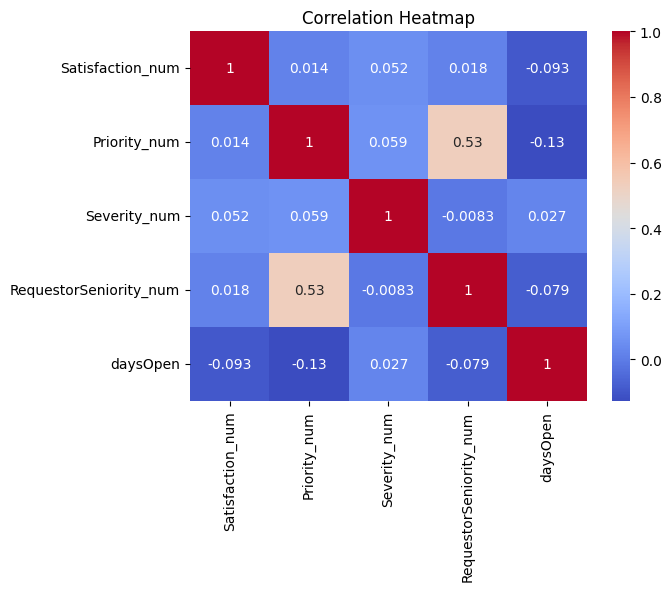

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **EDA Interpretation Based on Correlation Heatmap**

The correlation heatmap provides insights into how numeric variables relate to each other, particularly focusing on customer satisfaction (Satisfaction_num) in the context of IT Helpdesk service effectiveness.

## **1. Correlation with Satisfaction_num**


+daysOpen	     -0.093     Weak negative relationship: the longer a ticket is open, the less satisfied the customer tends to be.

+Priority_num	 +0.014	   Almost no correlation -  priority level doesn’t significantly affect satisfaction.

+Severity_num	 +0.059	   Slight positive relationship – higher severity might lead to more satisfaction, though not strongly.
RequestorSeniority_num	+0.018	Negligible effect – seniority of requester has minimal influence on satisfaction.

### **-->Key findings:**

Although the correlation coefficients are all small (|r| < 0.1), daysOpen is the variable with the most obvious negative impact on Satisfaction.

Factors such as Priority, Severity, and Seniority have almost zero correlation with satisfaction → need to be further tested with other analyses (classification distortion).

## **2. Correlation between other variables**

Combined variable Correlation coefficient Interpretation

Priority_num & RequestorSeniority_num +0.24 Seniors are more likely to request priority

daysOpen & RequestorSeniority_num -0.079 Seniors can process faster (indirectly)


##**Conclusion & Recommendations**

📉 Reduce ticket resolution time (daysOpen): it's the most important factor (though still weak) that negatively impacts satisfaction.

📈 Don't rely solely on correlation for actionable insights – the low correlation coefficients suggest non-linear or categorical relationships might be more important (e.g., Satisfaction vs. Severity level by category).

🧪 Further analysis is recommended:
+ Thru PowerBI Diagrams
+ Combine segment analysis by ticket type or handling department for deeper understanding.

###**Linear Regression**

In [ ]:
X = df_cleaned2[['Satisfaction_num','Priority_num','Severity_num','RequestorSeniority_num']]
y=df_cleaned2['daysOpen']
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               daysOpen   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     449.3
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:28:05   Log-Likelihood:            -2.1296e+05
No. Observations:               67064   AIC:                         4.259e+05
Df Residuals:                   67059   BIC:                         4.260e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      8

## **Load Data for PowerBI Analysis**

In [ ]:
df_cleaned2.to_csv('Cleaned_IT_Helpdesk.csv', index=False, encoding='utf-8-sig')
